In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('../../')

In [3]:
data = pd.read_csv('data/raw/data_o.csv')

In [4]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [6]:
primary = [
    'id'
]

numerical_cols = [
    'acousticness','danceability','energy','duration_ms',
    'instrumentalness','valence','popularity','tempo',
    'liveness','loudness','speechiness','year'
]

dummy_cols = [
    'explicit','mode'
]

categorical_cols = [
    'key','artists','release_date','name'
]

In [7]:
predictors = [
    'acousticness','danceability','energy','duration_ms',
    'instrumentalness','valence','tempo','liveness',
    'loudness','speechiness'
]

In [8]:
data[numerical_cols].describe()

,acousticness,danceability,energy,duration_ms,instrumentalness,valence,popularity,tempo,liveness,loudness,speechiness,year
count,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.502115,0.537396,0.482389,2.309483e+05,0.167010,0.528587,31.431794,116.861590,0.205839,-11.467990,0.098393,1976.787241
std,0.376032,0.176138,0.267646,1.261184e+05,0.313475,0.263171,21.826615,30.708533,0.174805,5.697943,0.162740,25.917853
min,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1921.000000
25%,0.102000,0.415000,0.255000,1.698270e+05,0.000000,0.317000,11.000000,93.421000,0.098800,-14.615000,0.034900,1956.000000
50%,0.516000,0.548000,0.471000,2.074670e+05,0.000216,0.540000,33.000000,114.729000,0.136000,-10.580000,0.045000,1977.000000
75%,0.893000,0.668000,0.703000,2.624000e+05,0.102000,0.747000,48.000000,135.537000,0.261000,-7.183000,0.075600,1999.000000
max,0.996000,0.988000,1.000000,5.403500e+06,1.000000,1.000000,100.000000,243.507000,1.000000,3.855000,0.970000,2020.000000


In [9]:
data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object


## Filtering and processing

In [10]:
def split_date(date_str: str) -> list[int]:
    """
    Expect a date string of the form %Y-%m-%d and parses it into a three element list

    Parameters:
        date_str: date to be formatted
    
    Returns:
        A list with three numbers that defaults to zero when said part cannot be parsed

    """
    separators = date_str.count('-')
    splitted = [int(x) for x in date_str.split('-')]
    if (separators == 0):
        return [int(date_str), 0, 0]
    elif (separators == 1):
        return [splitted[0], splitted[1], 0]
    elif (separators == 2):
        return [splitted[0], splitted[1], splitted[2]]
    else:
        return[0, 0, 0] 

In [11]:
date_array = np.asarray(
    list(map(split_date, data['release_date'].values))
)

In [12]:
#data['year'] = date_array[:,0]
data['month'] = date_array[:,1]
data['day'] = date_array[:,2]

In [13]:
cond1 = (data['year'] != 0)
cond2 = (data['month'] != 0)
cond3 = (data['day'] != 0)

data = (
    data[cond1 & cond1 & cond3]
    .reset_index(drop=True)
)

In [14]:
# Round years to the decade
data['decade'] = data['year'].apply(lambda x: round(x, -1))

In [15]:
data['decade'].value_counts()

2000    18326
2010    16488
1980    14284
1990    13698
1960    12284
2020    11809
1970    11697
1950     8765
1940     6386
1930     4101
1920      350
Name: decade, dtype: int64

In [16]:
data = data[(data['decade'] > 1920)]

## Plotting

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

<AxesSubplot:xlabel='Year', ylabel='Number of songs'>

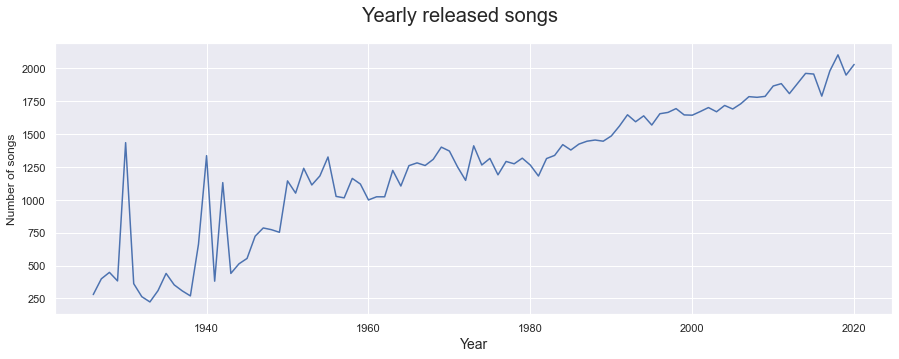

In [22]:
# Stores the yearly number of released songs
temp = (
    data[['year','id']].copy()
    .groupby('year', as_index=False)
    .agg({'id': 'count'})
)

# Number of songs released per year in datase
fig, axes = plt.subplots(figsize=(15,5))
plt.suptitle('Yearly released songs', fontsize=20)
axes.set_xlabel(xlabel='Year', fontsize=14)
axes.set_ylabel(ylabel='Number of songs')
sns.lineplot(data=temp, x='year', y='id', ax=axes)


In [25]:
# Stores the yearly average for each of the variables defined as predictors
temp = (
    data[['year']+predictors].copy()
    .groupby('year', as_index=True)
    .agg({ predictors[i]: ['mean'] for i in range(len(predictors)) })
)

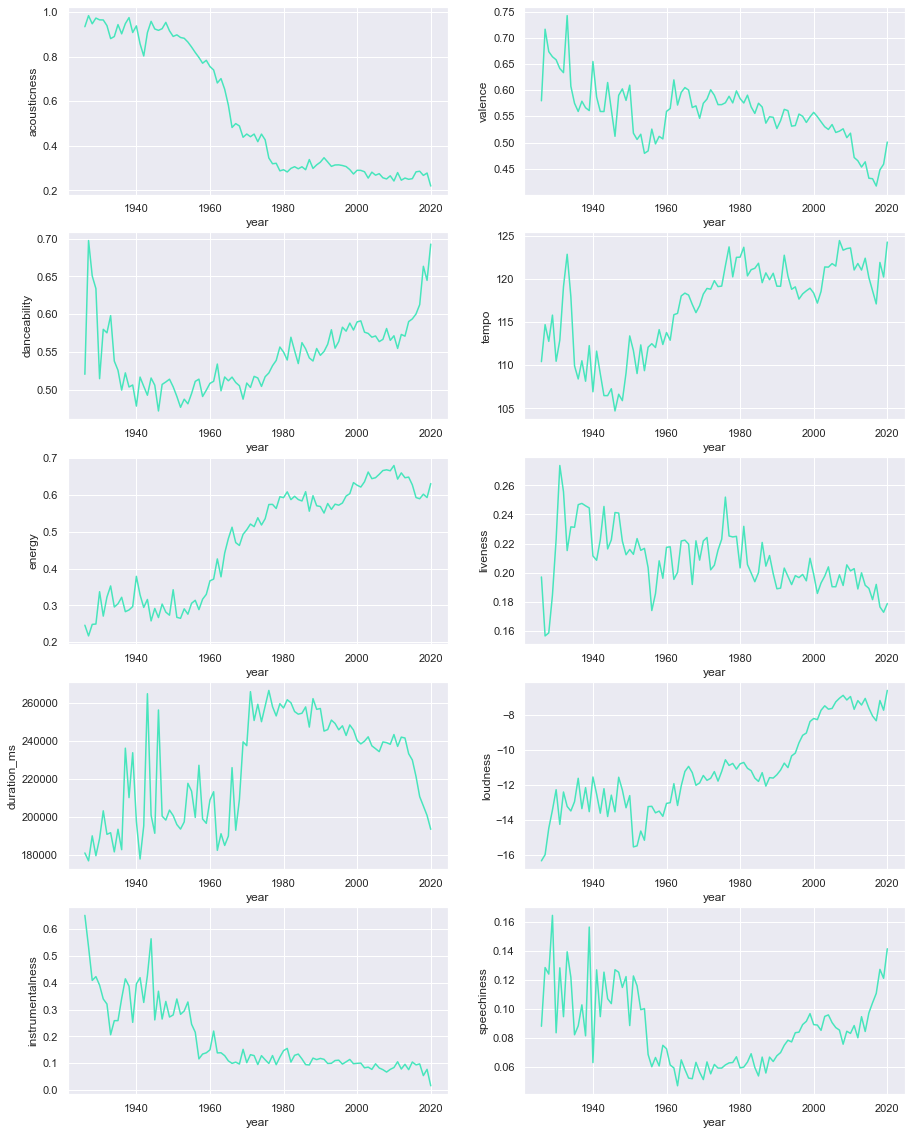

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))

for i in range(len(predictors)):
    predictor = predictors[i]
    temp_0 = temp[predictor].reset_index()
    # defining the axes index for each of the predictors
    j = i % 5
    k = 0 if i < 5 else 1
    sns.lineplot(data=temp_0, x='year', y='mean', ax=axes[j,k], color='#47E5BC')
    axes[j,k].set_ylabel(predictor)
    

In [ ]:
# !TODO
# scatterplot of certain variables and year of the song as the color code